# Lab 4

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 10/15/20

Description: Continuing to work with the adult data set mixed with probability

In [1]:
import pandas as pd # Pandas library
import numpy as np # Numpy library
import matplotlib.pyplot as plt # Matplotlib library for plotting

In [2]:
# Parse the file
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Part b
# i.
ed_col = adult_data[['education-num']]
# the 25th, 50th, and 75th percentile of education-num is shown below
ed_col.describe()

,education-num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


In [4]:
# ii.
# What is the probability that an adult makes more than $50K given that there education nums are given by the above quartiles?
# first quartile? ** REMEMBER # of >50K and in the first quartile / # of first quartile ====> The N cancels!!!! So now we can just divide the count by the count
prob_data = adult_data[['education-num', 'income']]
print("P(>50K | first quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 1) & (prob_data['education-num'] <= 9)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 1) & (prob_data['education-num'] <= 9)].count().sum())
# second quartile?
print("P(>50K | second quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 9) & (prob_data['education-num'] <= 10)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 9) & (prob_data['education-num'] <= 10)].count().sum())
# third quartile?
print("P(>50K | third quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 10) & (prob_data['education-num'] <= 12)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 10) & (prob_data['education-num'] <= 12)].count().sum())

P(>50K | first quartile of education-num) = 
income    0.065033
dtype: float64
P(>50K | second quartile of education-num) = 
income    0.08605
dtype: float64
P(>50K | third quartile of education-num) = 
income    0.103337
dtype: float64


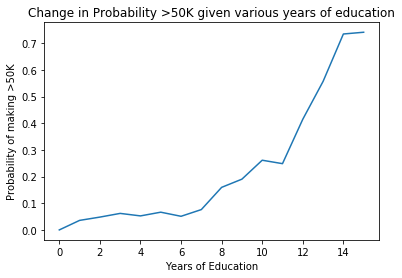

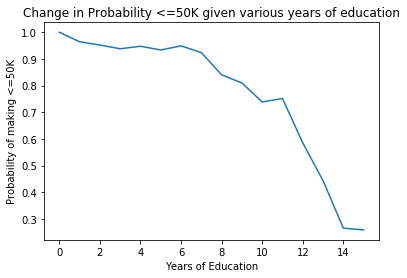

In [5]:
# iii.
# Plot the change in probability that a person makes more and less than $50K given their years of education
plot_prob_data = adult_data[['education-num', 'income']]
greater_data = plot_prob_data[plot_prob_data['income'] == '>50K']
plot_intersection = greater_data.groupby(by='education-num').count()
ed_data = plot_prob_data.groupby(by='education-num').count()
plot_intersection = plot_intersection.reset_index()
ed_data = ed_data.reset_index()
top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in ed_data.iterrows()]
top.insert(0,0)
y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability >50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making >50K')
plt.show()

plot_prob_data = adult_data[['education-num', 'income']]
lesser_data = plot_prob_data[plot_prob_data['income'] == '<=50K']
plot_intersection = lesser_data.groupby(by='education-num').count()
ed_data = plot_prob_data.groupby(by='education-num').count()
plot_intersection = plot_intersection.reset_index()
ed_data = ed_data.reset_index()
top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in ed_data.iterrows()]
y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability <=50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making <=50K')
plt.show()

In [6]:
# iv. 
# What is the covariance between the number of hours worked per week and education-num?


{'whiskers': [<matplotlib.lines.Line2D at 0x7fee68b3ba58>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee68b423c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee68b3b8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee68b42c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee68b4d0f0>],
 'means': []}

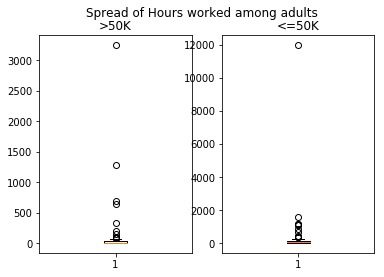

In [8]:
# v. 
# Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among adults 
# who make both more and less than $50k.
plot_greater = adult_data[['hr_per_week', 'income']]
plot_greater = plot_greater[plot_greater['income'] == '>50K']
plot_greater = plot_greater.groupby(by='hr_per_week').count()
plot_greater_list = [i[1] for i in plot_greater.reset_index().values]
plot_lesser = adult_data[['hr_per_week', 'income']]
plot_lesser = plot_lesser[plot_lesser['income'] == '<=50K'].groupby(by='hr_per_week').count()
plot_lesser_list = [i[1] for i in plot_lesser.reset_index().values]
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Spread of Hours worked among adults')
ax1.set_title('>50K')
ax2.set_title('<=50K')
ax1.boxplot(plot_greater_list)
ax2.boxplot(plot_lesser_list)

?                          AxesSubplot(0.1,0.808537;0.114286x0.0914634)
Cambodia              AxesSubplot(0.237143,0.808537;0.114286x0.0914634)
Canada                AxesSubplot(0.374286,0.808537;0.114286x0.0914634)
China                 AxesSubplot(0.511429,0.808537;0.114286x0.0914634)
Columbia              AxesSubplot(0.648571,0.808537;0.114286x0.0914634)
Cuba                  AxesSubplot(0.785714,0.808537;0.114286x0.0914634)
Dominican-Republic          AxesSubplot(0.1,0.69878;0.114286x0.0914634)
Ecuador                AxesSubplot(0.237143,0.69878;0.114286x0.0914634)
El-Salvador            AxesSubplot(0.374286,0.69878;0.114286x0.0914634)
England                AxesSubplot(0.511429,0.69878;0.114286x0.0914634)
France                 AxesSubplot(0.648571,0.69878;0.114286x0.0914634)
Germany                AxesSubplot(0.785714,0.69878;0.114286x0.0914634)
Greece                     AxesSubplot(0.1,0.589024;0.114286x0.0914634)
Guatemala             AxesSubplot(0.237143,0.589024;0.114286x0.0

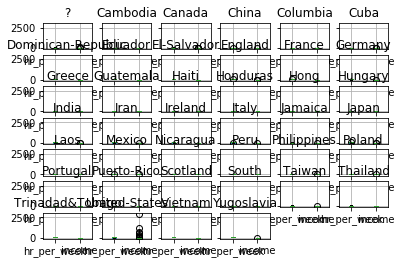

In [9]:
# vi. 
# Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among 
# adults from each native country and who make more and less than $50k.
plot_greater = adult_data[['hr_per_week', 'country', 'income']]
plot_greater = plot_greater[plot_greater['income'] == '>50K'].groupby(by=['country', 'hr_per_week']).count().reset_index().groupby(by='country')
print(plot_greater)
#plot_greater[['hr_per_week']].boxplot()
plot_greater.boxplot()

In [10]:
# vii. 
# Create a table where entry (x, y) contains the conditional probability P(A random adult has level of education x|they have level of education y).


In [11]:
# viii. Create a table where entry (x, y) contains the conditional probability of having marital status
# x given that they have occupation y.


In [12]:
# ix. What is the conditional probability of making more or less than $50k given that a person
# works in each different occupation?
cond_data = adult_data[['occupation', 'income']]
plot_intersection_greater = cond_data[cond_data['income'] == '>50K'].groupby(by='occupation').count().reset_index()
plot_bottom_greater = cond_data.groupby(by='occupation').count().reset_index()
top = [i[1]['income'] for i in plot_intersection_greater.iterrows()]
bottom = [i[1]['income'] for i in plot_bottom_greater.iterrows()]
prob_values = [i / j for i,j in zip(top,bottom)]
occupation_names = [i[1]['occupation'] for i in plot_intersection_greater.iterrows()]
print('Probability of making >50K given each occupation')
for index, val in enumerate(prob_values):
    print(f'P(>50K | {occupation_names[index]}) = {val}')

plot_intersection_lesser = cond_data[cond_data['income'] == '<=50K'].groupby(by='occupation').count().reset_index()
plot_bottom_lesser = cond_data.groupby(by='occupation').count().reset_index()
top = [i[1]['income'] for i in plot_intersection_lesser.iterrows()]
bottom = [i[1]['income'] for i in plot_bottom_lesser.iterrows()]
prob_values = [i / j for i,j in zip(top,bottom)]
print('\nProbability of making <=50K given each occupation')
for index, val in enumerate(prob_values):
    print(f'P(<=50K | {occupation_names[index]}) = {val}')

Probability of making >50K given each occupation
P(>50K | ?) = 0.10363537710255019
P(>50K | Adm-clerical) = 0.13448275862068965
P(>50K | Armed-Forces) = 0.1111111111111111
P(>50K | Craft-repair) = 0.22664064405952672
P(>50K | Exec-managerial) = 0.4840137727496311
P(>50K | Farming-fishing) = 0.11569416498993963
P(>50K | Handlers-cleaners) = 0.06277372262773723
P(>50K | Machine-op-inspct) = 0.12487512487512488
P(>50K | Other-service) = 0.04157814871016692
P(>50K | Priv-house-serv) = 0.006711409395973154
P(>50K | Prof-specialty) = 0.44903381642512075
P(>50K | Protective-serv) = 0.325115562403698
P(>50K | Sales) = 0.2693150684931507
P(>50K | Tech-support) = 0.30495689655172414
P(>50K | Transport-moving) = 0.20037570444583594

Probability of making <=50K given each occupation
P(<=50K | ?) = 0.8963646228974498
P(<=50K | Adm-clerical) = 0.8655172413793103
P(<=50K | Armed-Forces) = 0.8888888888888888
P(<=50K | Craft-repair) = 0.7733593559404733
P(<=50K | Exec-managerial) = 0.5159862272503689
P

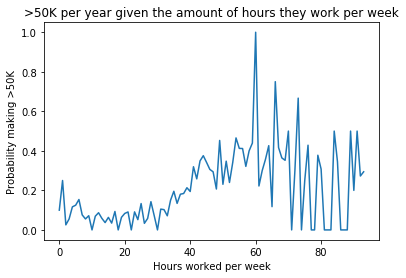

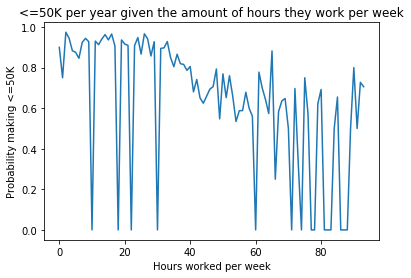

In [13]:
# x. 
# Plot the change in probability that a person makes more and less than $50k given the amount that they work per week.
prob_data = adult_data[['hr_per_week', 'income']]
plot_greater_intersection = prob_data[prob_data['income'] == '>50K'].groupby(by='hr_per_week').count().reset_index()
plot_greater_bottom = prob_data.groupby(by='hr_per_week').count().reset_index()
top_index = [i[1]['hr_per_week'] for i in plot_greater_intersection.iterrows()]
bottom_index = [i[1]['hr_per_week'] for i in plot_greater_bottom.iterrows()]
test1 = set(top_index)
test2 = set(bottom_index)
tmp = test2.difference(test1)
insert_indices = sorted(tmp)
top = [(i[1]['hr_per_week'],i[1]['income']) for i in plot_greater_intersection.iterrows()]
bottom = [i[1]['income'] for i in plot_greater_bottom.iterrows()]
for i in insert_indices:
    top.append((i,0))

top.sort(key= lambda x: x[0])
top = [i[1] for i in top]

y_values = [i / j for i,j in zip(top,bottom)]
x_values = [i for i in range(0,94)]

plt.plot(x_values,y_values)
plt.title('>50K per year given the amount of hours they work per week')
plt.xlabel('Hours worked per week')
plt.ylabel('Probability making >50K')
plt.show()

plot_lesser_intersection = prob_data[prob_data['income'] == '<=50K'].groupby(by='hr_per_week').count().reset_index()
plot_lesser_bottom = prob_data.groupby(by='hr_per_week').count().reset_index()
top_index = [i[1]['hr_per_week'] for i in plot_lesser_intersection.iterrows()]
bottom_index = [i[1]['hr_per_week'] for i in plot_lesser_bottom.iterrows()]
test1 = set(top_index)
test2 = set(bottom_index)
tmp = test2.difference(test1)
insert_indices = sorted(tmp)
top = [(i[1]['hr_per_week'],i[1]['income']) for i in plot_lesser_intersection.iterrows()]
bottom = [i[1]['income'] for i in plot_lesser_bottom.iterrows()]
for i in insert_indices:
    top.append((i,0))

top.sort(key= lambda x: x[0])
top = [i[1] for i in top]

y_values = [i / j if i < j else 0 for i,j in zip(top,bottom)]
x_values = [i for i in range(0,94)]
plt.plot(x_values,y_values)
plt.title('<=50K per year given the amount of hours they work per week')
plt.xlabel('Hours worked per week')
plt.ylabel('Probability making <=50K')
plt.show()